## <p style="text-align: center;">**Laboratory Session** : April 30, 2023</p>
#### <p style="text-align: center;">Exercises due on : May 13, 2023</p>

**Student**: Cavezza Lorenzo <br>
**Matricola**: 2130648

In [1]:
library("glue")
library("lubridate")
library(ggplot2)
library(tidyverse) 
library(actuar)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.3     ✔ stringr 1.5.0
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
✔ readr   2.1.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘actuar’


The following objects are masked from ‘package:stats’:

    sd, var


The following object is masked from ‘package:grDevices’:

    cm




### Exercise 1: Bayesian Inference for Poisson model

The number of particles emitted by a radioactive source during a xed interval of time
($\Delta t$ = 10 s) follows a Poisson distribution on the parameter . The number of particles
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.

(a) assuming a positive uniform prior distribution for the parameter 
- determine and draw the posterior distribution for $\mu$, given the data


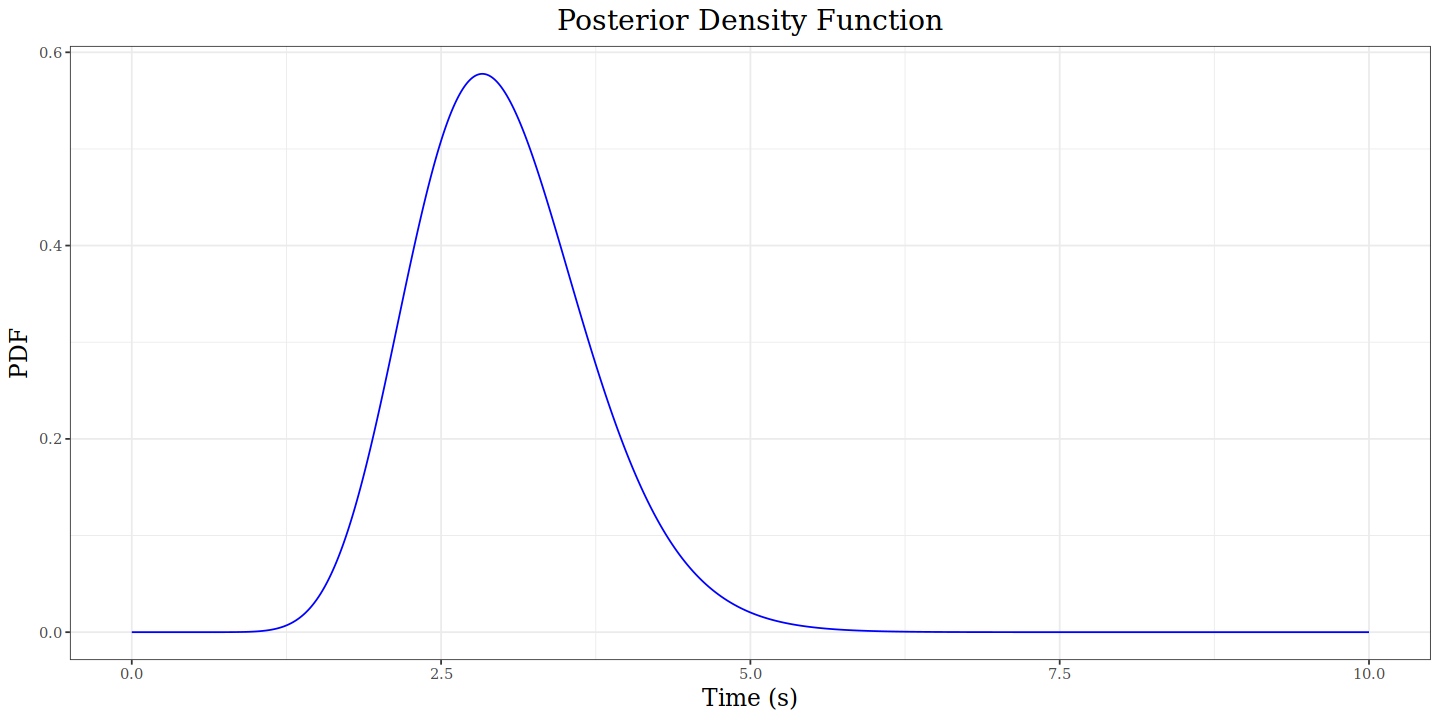

In [175]:
#The likelihood for a poisson process given n independent measurements is a gamma distribution with alfa=sum(measures) + 1 and lambda = n
#Given a uniform prior the resulting posterior is proportional to the said likelihood with a normalization constant

measures<-c(4,1,3,1,5,3)
alfa_unif<-sum(measures)+1
lambda_unif<-length(measures)

times<-seq(0,10,0.001)
posterior_unif<-dgamma(x=times,shape=alfa_unif,rate=lambda_unif)
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data=data.frame(times,posterior_unif), aes(x=times, y=posterior_unif, group=1)) +
  geom_line(color="blue")+
labs(
title="Posterior Density Function",
y="PDF",
x="Time (s)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))


- evaluate mean, median and variance, both analytically and numerically in R

In [110]:
#The analytic mean is alfa/lambda and the variance is alfa/(lambda)^2
mean_analytic<-alfa_unif/lambda_unif
variance_analytic<-alfa_unif/(lambda_unif**2)

cat("The analytic mean is",mean_analytic,"and the analytic variance is",variance_analytic,"\n")

func_x<-function(x){
return (x*dgamma(x=x,shape=alfa_unif,rate=lambda_unif))
}
func_x2<-function(x){
return ((x**2)*dgamma(x=x,shape=alfa_unif,rate=lambda_unif))
}
mean_num<-integrate(f=func_x,lower=0,upper=10)$value
variance_num<-integrate(f=func_x2,lower=0,upper=10)$value-mean_num**2

cat("The numerically computed mean is",mean_num,"and the numerically computed variance is",variance_num,"\n")

median<-qgamma(p=0.5,shape=alfa_unif,rate=lambda_unif)

cat("The median is",round(median,3))

The analytic mean is 3 and the analytic variance is 0.5 
The numerically computed mean is 3 and the numerically computed variance is 0.5 
The median is 2.945

(b) assuming a Gamma prior such that the expected value is  = 3 with a standard
deviation  = 1,
- determine and draw the posterior distribution for $\mu$, given the data

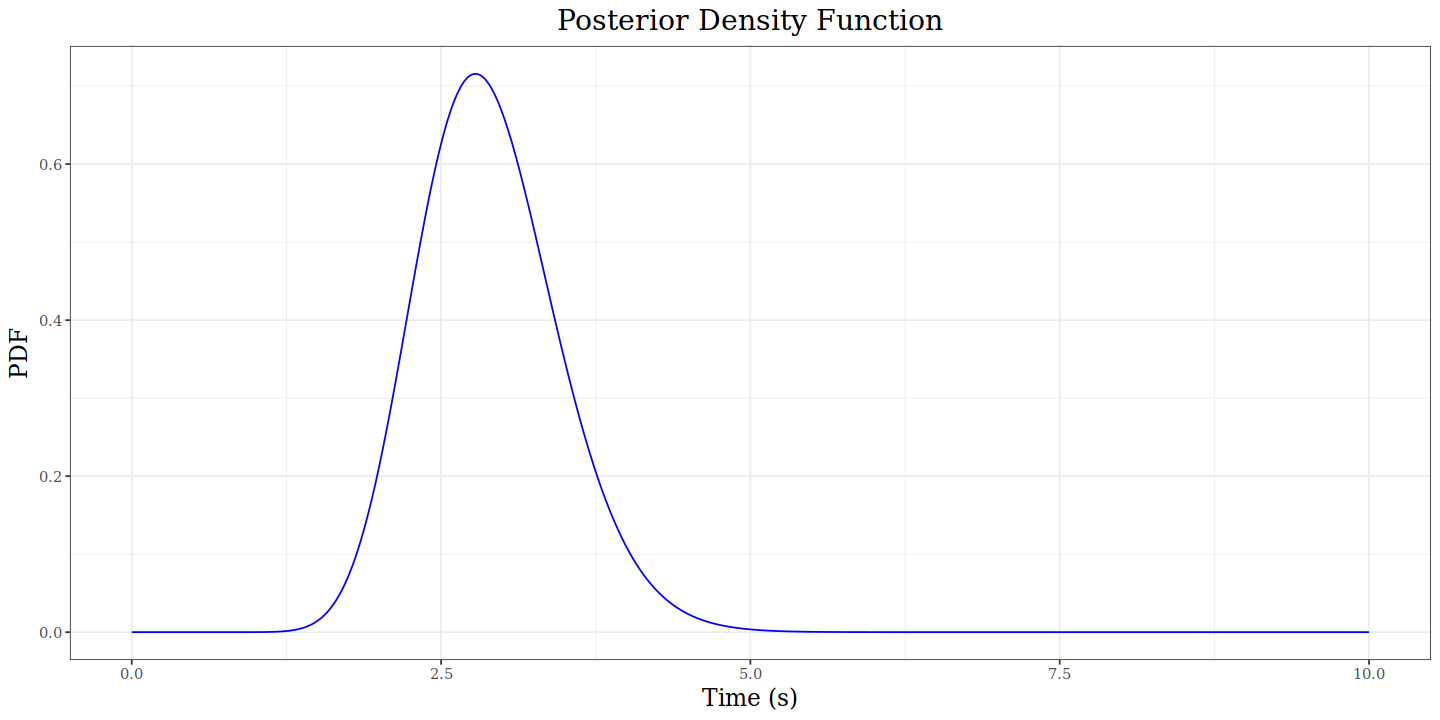

In [111]:
#the shape is (m/s)^2 and the rate is m/(s^2)
mean<-3
std<-1

alfa<-(mean/std)**2
lambda<-mean/(std**2)

#The posterior is a gamma with alfa'=alfa+sum(measures) and lambda'=lambda+n
alfa_prime<-sum(measures)+alfa
lambda_prime<-length(measures)+lambda
posterior_gamma<-dgamma(x=times,shape=alfa_prime,rate=lambda_prime)

options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data=data.frame(times,posterior_gamma), aes(x=times, y=posterior_gamma, group=1)) +
  geom_line(color="blue")+
labs(
title="Posterior Density Function",
y="PDF",
x="Time (s)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

- evaluate mean, median and variance, both analytically and numerically in R.

In [112]:
#The analytic mean is alfa/lambda and the variance is alfa/(lambda)^2
mean_analytic<-alfa_prime/lambda_prime
variance_analytic<-alfa_prime/(lambda_prime**2)

cat("The analytic mean is",round(mean_analytic,2),"and the analytic variance is",round(variance_analytic,2),"\n")

func_x<-function(x){
return (x*dgamma(x=x,shape=alfa_prime,rate=lambda_prime))
}
func_x2<-function(x){
return ((x**2)*dgamma(x=x,shape=alfa_prime,rate=lambda_prime))
}
mean_num<-integrate(f=func_x,lower=0,upper=10)$value
variance_num<-integrate(f=func_x2,lower=0,upper=10)$value-mean_num**2

cat("The numerically computed mean is",round(mean_num,2),"and the numerically computed variance is",round(variance_num,2),"\n")

median<-qgamma(p=0.5,shape=alfa_prime,rate=lambda_prime)

cat("The median is",round(median,2))

The analytic mean is 2.89 and the analytic variance is 0.32 
The numerically computed mean is 2.89 and the numerically computed variance is 0.32 
The median is 2.85

(c) evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

The 95 % credibility interval for the uniform prior is: 1.78 - 4.54 
While for the relative normal distribution is: 1.61 - 4.39 
The 95 % credibility interval for the gamma prior is: 1.89 - 4.1 
While for the relative normal distribution is: 1.78 - 4 


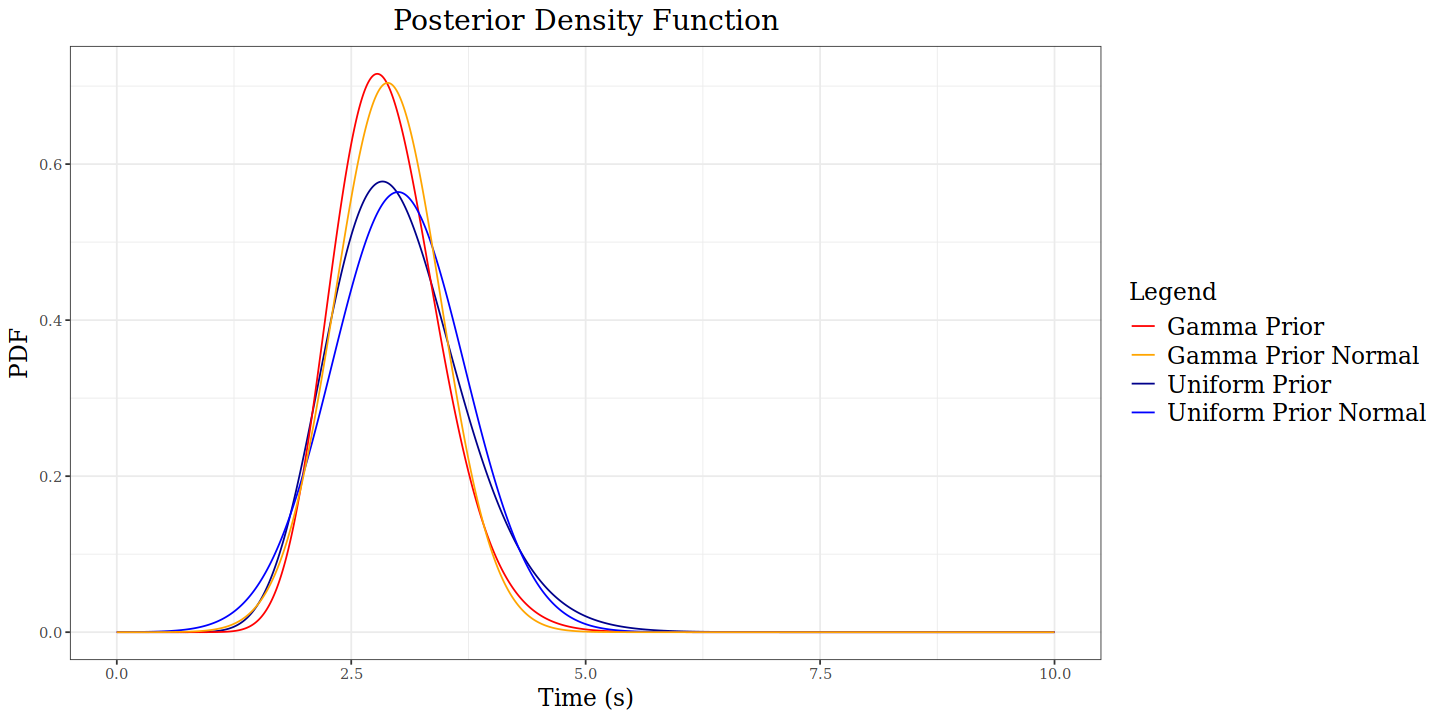

In [130]:
lower_unif<-qgamma(p=0.025,shape=alfa_unif,rate=lambda_unif)
upper_unif<-qgamma(p=0.975,shape=alfa_unif,rate=lambda_unif)
lower_gamma<-qgamma(p=0.025,shape=alfa_prime,rate=lambda_prime)
upper_gamma<-qgamma(p=0.975,shape=alfa_prime,rate=lambda_prime)
lower_unif_norm<-qnorm(p=0.025,mean=alfa_unif/lambda_unif,sd=sqrt(alfa_unif/(lambda_unif**2)))
upper_unif_norm<-qnorm(p=0.975,mean=alfa_unif/lambda_unif,sd=sqrt(alfa_unif/(lambda_unif**2)))
lower_gamma_norm<-qnorm(p=0.025,mean=alfa_prime/lambda_prime,sd=sqrt(alfa_prime/(lambda_prime**2)))
upper_gamma_norm<-qnorm(p=0.975,mean=alfa_prime/lambda_prime,sd=sqrt(alfa_prime/(lambda_prime**2)))

cat("The 95 % credibility interval for the uniform prior is:",round(lower_unif,2),"-",round(upper_unif,2),"\n")
cat("While for the relative normal distribution is:",round(lower_unif_norm,2),"-",round(upper_unif_norm,2),"\n")
cat("The 95 % credibility interval for the gamma prior is:",round(lower_gamma,2),"-",round(upper_gamma,2),"\n")
cat("While for the relative normal distribution is:",round(lower_gamma_norm,2),"-",round(upper_gamma_norm,2),"\n")

posterior_unif_norm<-dnorm(x=times,mean=alfa_unif/lambda_unif,sd=sqrt(alfa_unif/(lambda_unif**2)))
posterior_gamma_norm<-dnorm(x=times,mean=alfa_prime/lambda_prime,sd=sqrt(alfa_prime/(lambda_prime**2)))


options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=data.frame(times,posterior_unif), aes(x=times, y=posterior_unif,colour="Uniform Prior",group=1))+
  geom_line(data=data.frame(times,posterior_gamma), aes(x=times, y=posterior_gamma,colour="Gamma Prior",group=1))+
  geom_line(data=data.frame(times,posterior_unif_norm), aes(x=times, y=posterior_unif_norm,,colour="Uniform Prior Normal",group=1))+
  geom_line(data=data.frame(times,posterior_gamma_norm), aes(x=times, y=posterior_gamma_norm,colour="Gamma Prior Normal",group=1))+
  scale_color_manual(name = "Legend", values = c("Uniform Prior" = "darkblue", "Uniform Prior Normal" = "blue", "Gamma Prior" = "red", "Gamma Prior Normal"="orange"))+
labs(
title="Posterior Density Function",
y="PDF",
x="Time (s)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


### Exercise 2: Efficiency using Bayesian approach

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose,
he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1
and Det3. Let n be the number of signals recorded simultaneously by Det1 and Det3, and
r be those also recorded by Det2, researcher A obtains n = 500 and r = 312.

Assuming a binomial model where n is the number of trials and r is the number of
success out of n trials,

a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis
of:
- uniform prior  $U$(0; 1)

In [154]:
#Given an uniform prior we get the mean and variance as the maximum of the log-Posterior Probability and as the square root of the 
#opposite of the second derivative of the log-Posterior Porbability at the maximum
r<-312
n<-500
mean_unif<-r/n
std_unif<-(1/n)*sqrt((r*(n-r))/n)
cat("The mean is",round(mean_unif,3),"+/-",round(std_unif,3))

The mean is 0.624 +/- 0.022

- Jeffrey's prior  $Beta$(1/2; 1/2)

In [155]:
#The procedure is the same for the beta prior
alfa<-0.5
beta<-0.5
mean_beta<-(r+alfa-1)/(n+alfa+beta-2)
std_beta<-(1/(alfa+beta+n-2))*sqrt((alfa+r-1)/(alfa+r))
cat("The mean is",round(mean_beta,3),"+/-",round(std_beta,3))

The mean is 0.624 +/- 0.002

b) Plot the posterior distributions for both cases

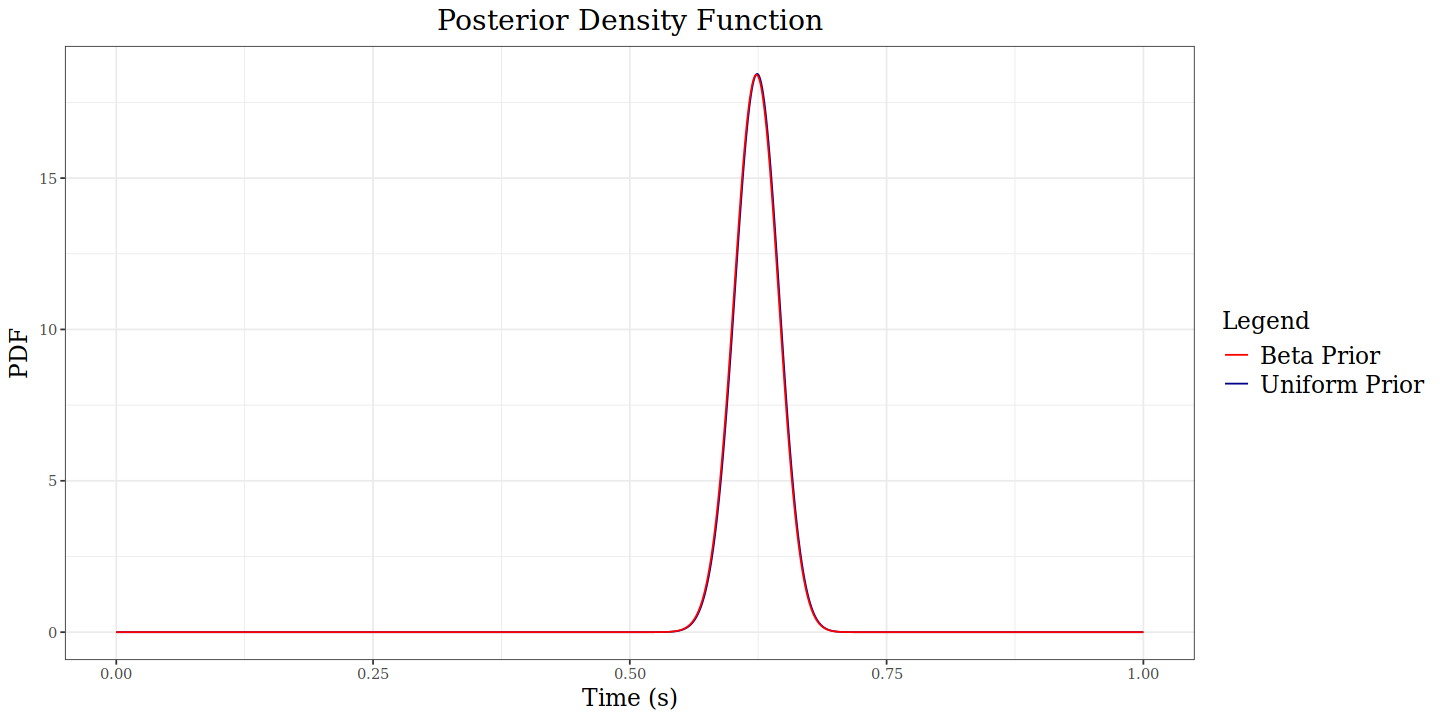

In [170]:
p<-seq(0,1,0.001)

func_unif<-function(p){
return (dbinom(x=r,size=n,prob=p))
}
func_beta<-function(p){
return (dbinom(x=r-1,size=n-1,prob=p))
}
normalization_unif<-integrate(func_unif,lower=0,upper=1)$value
posterior_unif<-dbinom(x=r,size=n,prob=p)/normalization_unif
normalization_beta<-integrate(func_beta,lower=0,upper=1)$value
posterior_beta<-dbinom(x=r-1,size=n-1,prob=p)/normalization_beta

options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=data.frame(p,posterior_unif), aes(x=p, y=posterior_unif,colour="Uniform Prior",group=1))+
  geom_line(data=data.frame(p,posterior_beta), aes(x=p, y=posterior_beta,colour="Beta Prior",group=1))+
  scale_color_manual(name = "Legend", values = c("Uniform Prior" = "darkblue", "Beta Prior" = "red"))+
labs(
title="Posterior Density Function",
y="PDF",
x="Time (s)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


Taking into account that the same detector has been studied by researcher B, who has
performed only n = 10 measurements and has obtained r = 10 signals,

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior
with the results of researcher B.

The mean is 1 +/- 0

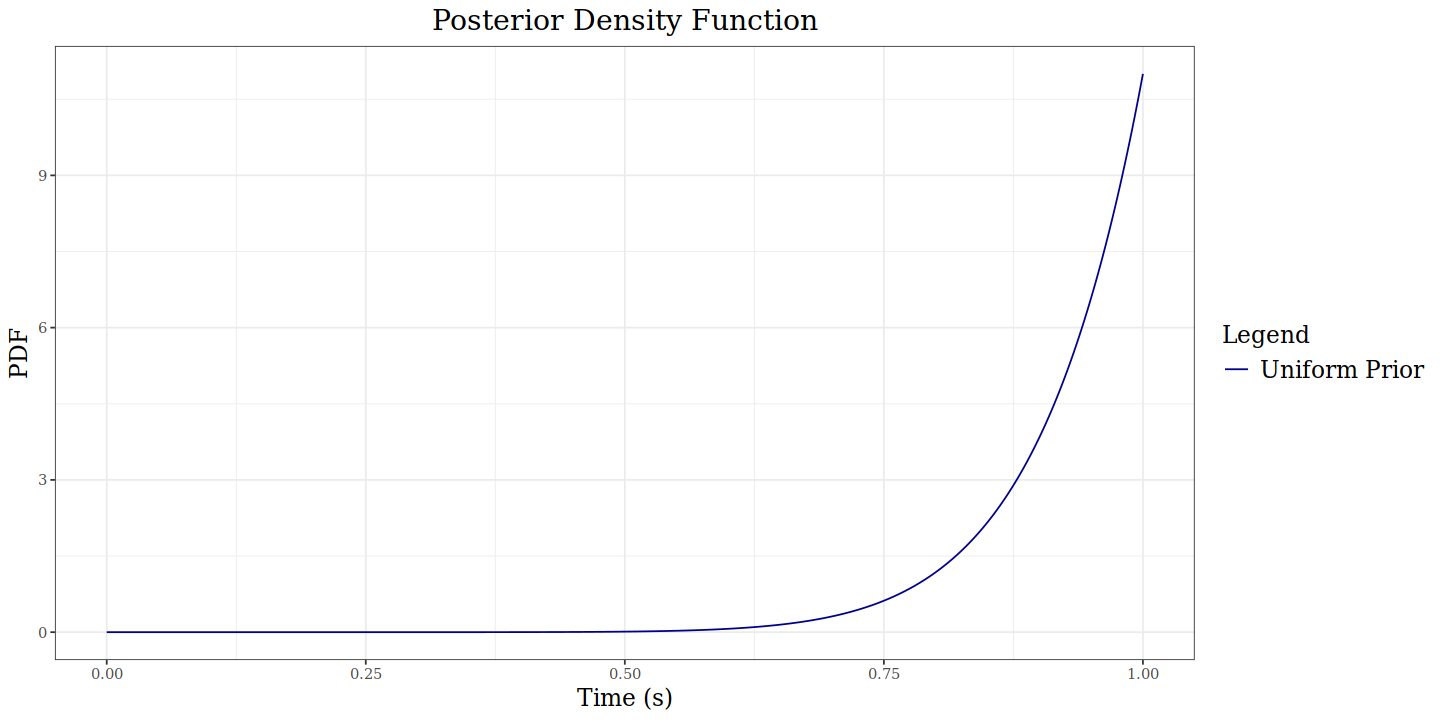

In [179]:
#Given an uniform prior we get the mean and variance as the maximum of the log-Posterior Probability and as the square root of the 
#opposite of the second derivative of the log-Posterior Porbability at the maximum
r<-10
n<-10
mean_unif<-r/n
std_unif<-(1/n)*sqrt((r*(n-r))/n)
cat("The mean is",round(mean_unif,3),"+/-",round(std_unif,3))

p<-seq(0,1,0.001)

func_unif<-function(p){
return (dbinom(x=r,size=n,prob=p))
}

normalization_unif<-integrate(func_unif,lower=0,upper=1)$value
posterior_unif<-dbinom(x=r,size=n,prob=p)/normalization_unif


options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=data.frame(p,posterior_unif), aes(x=p, y=posterior_unif,colour="Uniform Prior",group=1))+
  scale_color_manual(name = "Legend", values = c("Uniform Prior" = "darkblue"))+
labs(
title="Posterior Density Function",
y="PDF",
x="Time (s)"
)


p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))



d) Repeat the computation of points a) and b) with the data of researcher A using as a
prior the posterior obtained from point c).

The mean is 0.631 +/- 0.021 


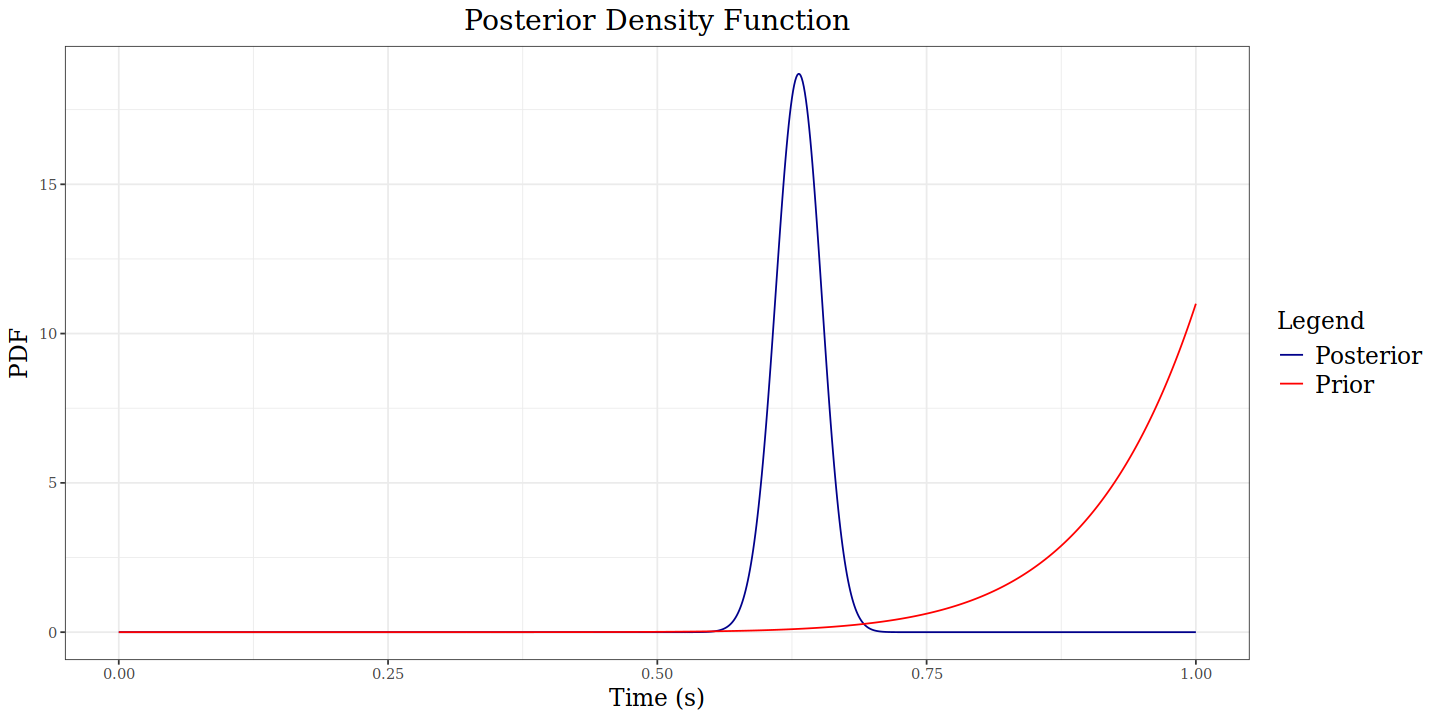

In [191]:
p<-seq(0,1,0.001)
r=312
n=500

prior<-function(p){(dbinom(x=10,size=10,prob=p))*(1/normalization_unif)}
func<-function(p){
return (dbinom(x=r,size=n,prob=p)*prior(p))
}


normalization<-integrate(func,lower=0,upper=1)$value
posterior<-prior(p)*dbinom(x=r,size=n,prob=p)/normalization

func_mean<-function(p){p*func(p)*(1/normalization)}
func_var<-function(p){p**2*func(p)*(1/normalization)}

mean_post<-integrate(func_mean,0,1)$value
var_post<-integrate(func_var,0,1)$value

cat("The mean is",round(mean_post,3),"+/-",round(sqrt((var_post-mean_post**2)),3),"\n")

options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot() + 
  geom_line(data=data.frame(p,posterior), aes(x=p, y=posterior,colour="Posterior",group=1))+
  geom_line(data=data.frame(p,prior(p)), aes(x=p, y=prior(p),colour="Prior",group=1))+
  scale_color_manual(name = "Legend", values = c("Posterior" = "darkblue", "Prior" = "red"))+
labs(
title="Posterior Density Function",
y="PDF",
x="Time (s)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),
                   legend.text=element_text(size=14),legend.title=element_text(size=14))+theme(text = element_text(family = "Times New Roman"))


e) [Optional] Compute 95% credible interval using the posterior of the previous point
d).

### Exercise 3 - Bayesian Inference for Binomial model

• A coin is 
ipped n = 30 times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H,
T, H, T, H, H, H

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior
distributions for the data set.

In [194]:
#Head is success, Tails is failure
measures<-c(1,1,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0)
n<-length(measures)
r<-sum(measures)
p<-seq(0,1,0.001)

prior_flat<-function(p){1}
prior_beta<-function(p){dbeta(x=p,shape1=0.5,shape2=0.5)}
likelihood<-function(p){dbinom(x=r,size=n,prob=p)}
normalization_flat<-integrate((prior_flat(p)*likelihood(p)),0,1)$value
normalization_beta<-integrate(prior_beta(p)*likelihood(p),0,1)$value

posterior_flat<-(dbinom(x=r,size=n,prob=p)*prior_flat(p))/normalization_flat
posterior_beta<-(dbinom(x=r,size=n,prob=p)*prior_beta(p))/normalization_beta



ERROR: Error in match.fun(f): '(prior_flat(p) * likelihood(p))' is not a function, character or symbol


b) Evaluate the most probable value for the coin probability p and, integrating the
posterior probability distribution, give an estimate for a 95% credibility interval.

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the
most probable value and the credibility interval change as a function of the number
of coin tosses (i.e. from 1 to 30).

d) Do you get a dierent result, by analysing the data sequentially with respect to a
one-step analysis (i.e. considering all the data as a whole) ?

### Exercise 4 - Poll

A couple of days before an election in which four parties (A,B,C,D) compete, a poll is
taken using a sample of 200 voters who express the following preferences 57, 31,45 and 67
for, respectively, parties A,B,C and D.
Using a Bayesian approach, for all parties

• Calculate the expected percentage of votes and a 68% credibility interval by assuming
as prior a
- uniform prior

- a prior constructed from the results obtained from another poll conducted the
previous week on a sample of 100 voters who expressed the following preferences
32,14,26,28 for, respectively, parties A,B,C and D.

• Sample size to obtain a margin of error less or equal than 3% for each party